# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score, roc_curve

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [4]:
color_palette = ['#AD4A2B', '#6A7B73', '#3D3E3B', '#E78F63', '#F7C7B1']
colors = ['#6A7B73', '#E78F63']

cmap = LinearSegmentedColormap.from_list("color_palette", colors, N=50)

sns.set(style="whitegrid", palette=color_palette)

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [5]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 47.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 71.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 27.3MB/s]


In [6]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [7]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [8]:
train.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
326,1,79.35,79.35,Female,0,Yes,No,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),1
746,57,112.95,6465,Female,0,No,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),1
577,10,102.10,1068.85,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),1
4430,71,64.05,4492.9,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Credit card (automatic),0
1158,3,91.50,242.95,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),1


In [9]:
train.shape

(5282, 20)

*  Сначала посмотрим на числовые признаки

In [10]:
train[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ClientPeriod     5282 non-null   int64  
 1   MonthlySpending  5282 non-null   float64
 2   TotalSpent       5282 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 123.9+ KB


*  Видим, что пропусков в данных нет. Однако колонка $TotalSpent$ имеет тип $object$. Преобразуем его в тип $float64$ и заметим при этом, что есть строки с пустыми значениями признака.

In [11]:
train[num_cols][train['TotalSpent'] == ' ']

,ClientPeriod,MonthlySpending,TotalSpent
1048,0,25.75,
1707,0,73.35,
2543,0,19.70,
3078,0,80.85,
3697,0,20.00,
4002,0,61.90,
4326,0,25.35,
4551,0,52.55,
4598,0,56.05,


*  Заметим, что во всех таких строках значение признака $ClientPeriod$ равно 0, само значение $TotalSpent$ примерно совпадает с произведением $ClientPeriod$ и $MonthlySpending$. Поэтому заполним данные пропуски нулевым значением.

In [12]:
train['TotalSpent'] = train['TotalSpent'].replace(' ', '0.0')
train['TotalSpent'] = train['TotalSpent'].astype('float64')

test['TotalSpent'] = test['TotalSpent'].replace(' ', '0.0')
test['TotalSpent'] = test['TotalSpent'].astype('float64')

*  Посотрми на категориальные признаки

In [13]:
train[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sex                       5282 non-null   object
 1   IsSeniorCitizen           5282 non-null   int64 
 2   HasPartner                5282 non-null   object
 3   HasChild                  5282 non-null   object
 4   HasPhoneService           5282 non-null   object
 5   HasMultiplePhoneNumbers   5282 non-null   object
 6   HasInternetService        5282 non-null   object
 7   HasOnlineSecurityService  5282 non-null   object
 8   HasOnlineBackup           5282 non-null   object
 9   HasDeviceProtection       5282 non-null   object
 10  HasTechSupportAccess      5282 non-null   object
 11  HasOnlineTV               5282 non-null   object
 12  HasMovieSubscription      5282 non-null   object
 13  HasContractPhone          5282 non-null   object
 14  IsBillingPaperless      

*  Здесь также на первый взгляд отсутствуют пропуски. Тип данных в колонке $IsSeniorCitizen$ поменяем на $object$. Для удобства отображения и анализа заменим значения $1$ и $0$ на $Yes$ и $No$ соответственно.         

In [14]:
train['IsSeniorCitizen'] = train['IsSeniorCitizen'].astype('object')
train['IsSeniorCitizen'] = train['IsSeniorCitizen'].replace(to_replace={1, 'Yes', 0, 'No'}, value=None)

test['IsSeniorCitizen'] = test['IsSeniorCitizen'].astype('object')
test['IsSeniorCitizen'] = test['IsSeniorCitizen'].replace(to_replace={1, 'Yes', 0, 'No'}, value=None)

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

*  Построим коробчатые диаграммы для численных признаков

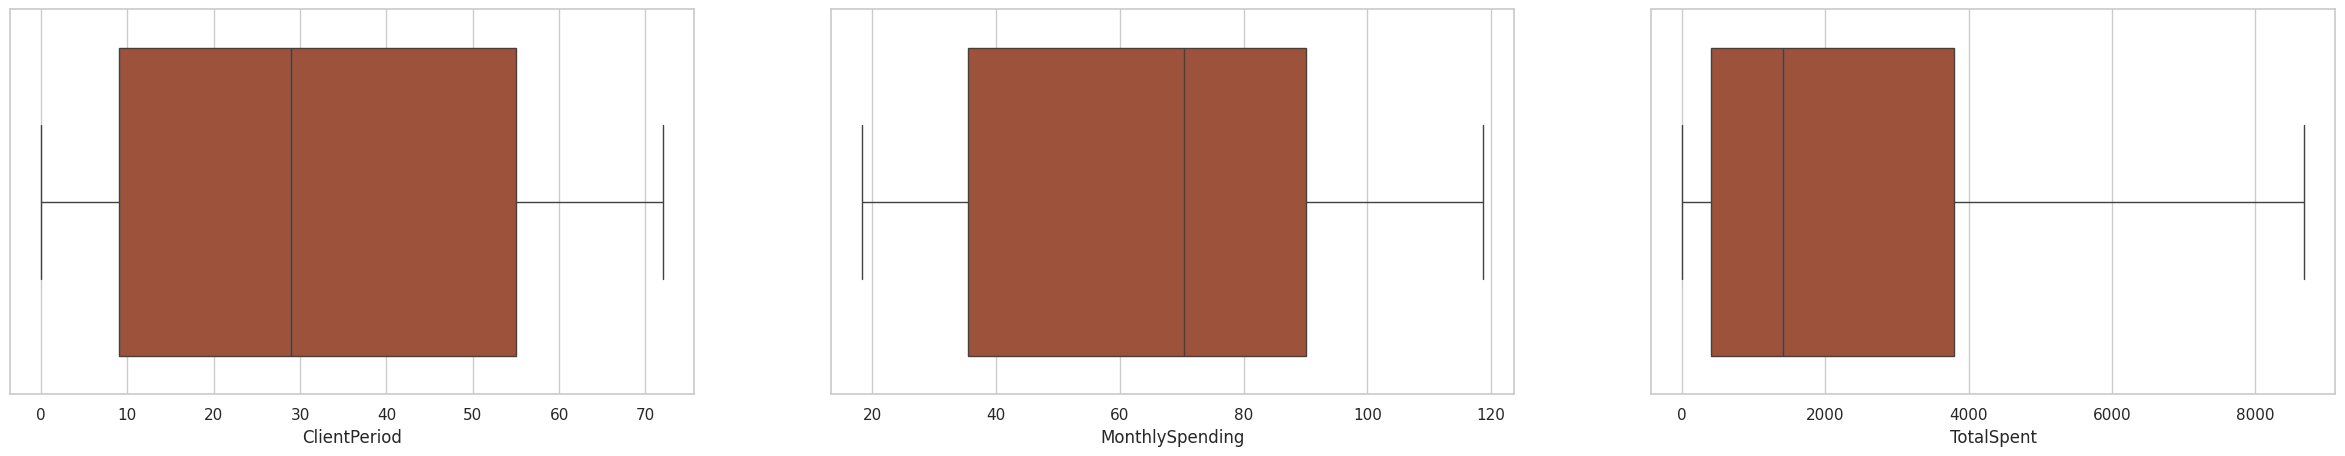

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 5))

for i, column in enumerate(num_cols):
  sns.boxplot(x=train[column], ax=ax[i], orient='x')

*  Посмотрим на распределение значений для категориальных признаков

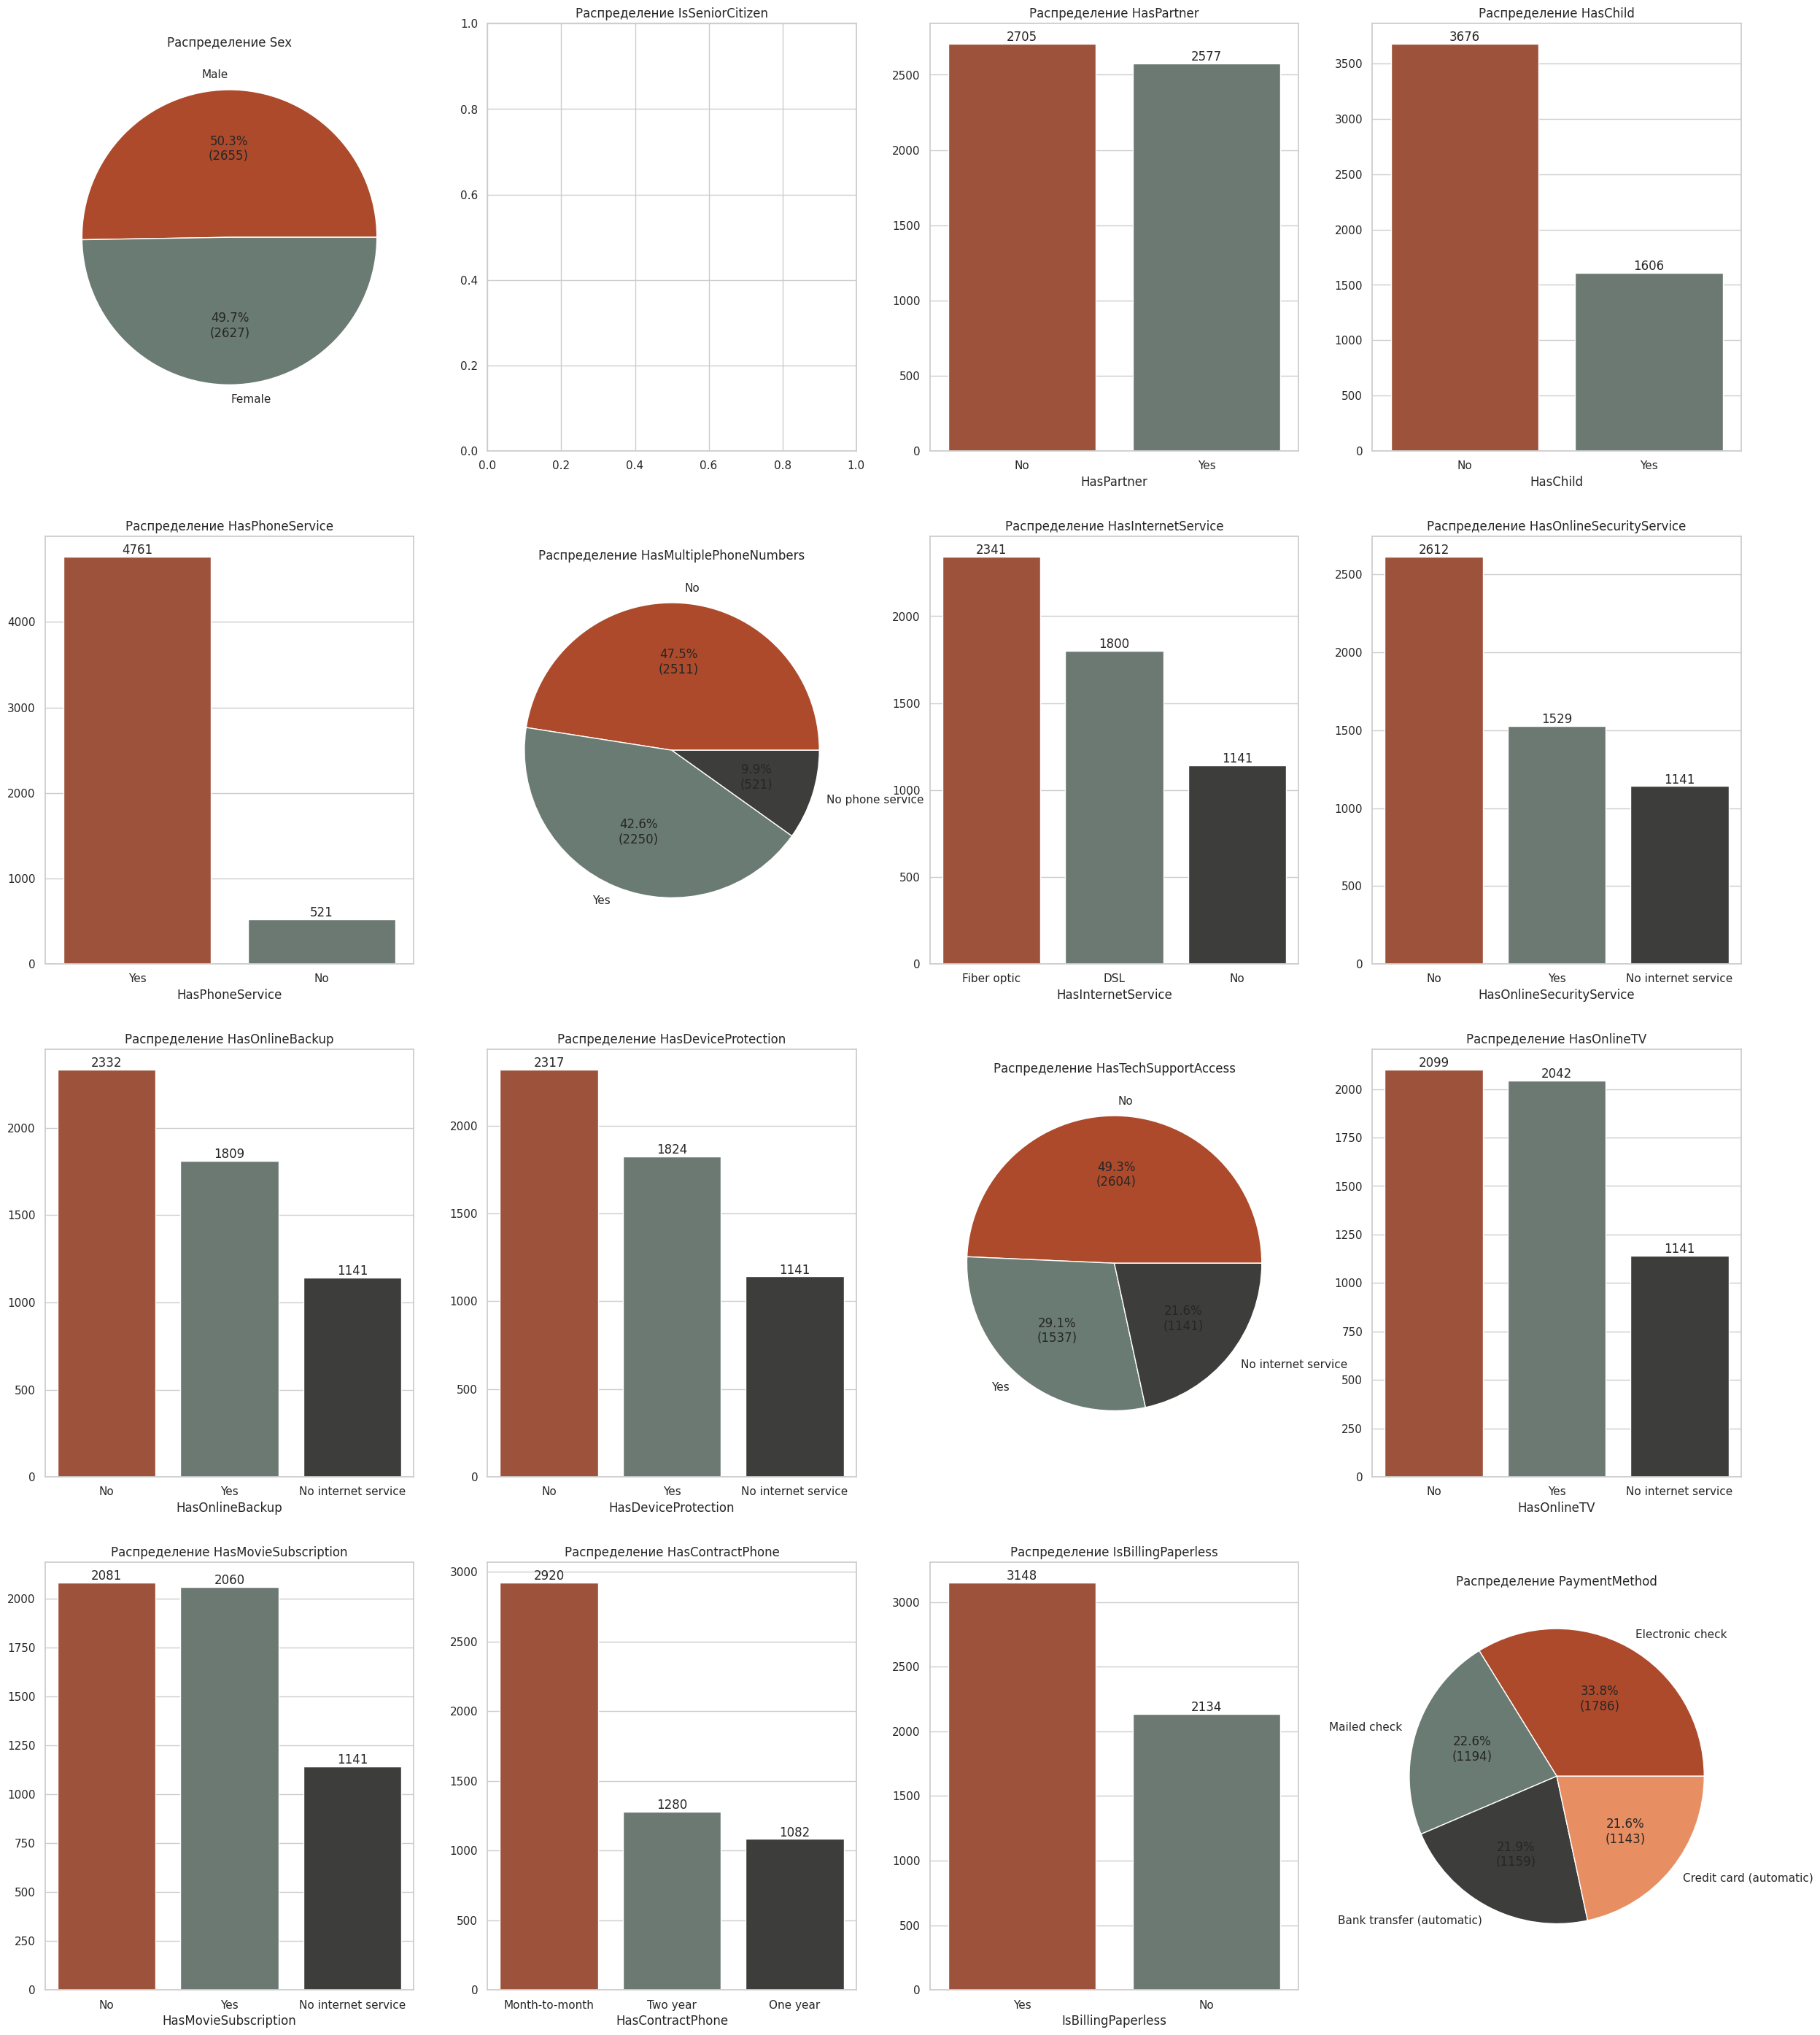

In [16]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(30,35))

def pct_func(pct, data):
    absolute = int(np.round(pct/100. * np.sum(data)))
    return f"{pct:.1f}%\n({absolute:d})"

for i, feature in enumerate(cat_cols):
  row, col = i // 4, i % 4
  stat_data = train[feature].value_counts()
  values = stat_data.values
  labels = stat_data.index
  if row == col:
    ax[row, col].pie(values, labels=labels, autopct=lambda pct: pct_func(pct, values))
  else:
    sns.barplot(x=labels, y=values, hue=labels, ax=ax[row, col])
    for container in ax[row, col].containers:
      ax[row, col].bar_label(container=container)
  ax[row, col].set_title(f'Распределение {feature}')

*  Посмотрим на признаки по отдельности

1.   $Sex$



In [17]:
train['Sex'].value_counts()

,count
Sex,
Male,2655
Female,2627


2.  $IsSeniorCitizen$

In [18]:
train['IsSeniorCitizen'].value_counts()

,count
IsSeniorCitizen,


3.   $HasPartner$, $HasChild$



In [19]:
train['HasPartner'].value_counts()

,count
HasPartner,
No,2705
Yes,2577


In [20]:
train['HasChild'].value_counts()

,count
HasChild,
No,3676
Yes,1606


4.   $HasPhoneService$, $HasMultiplePhoneNumbers$, $HasContractPhone$


In [21]:
train['HasPhoneService'].value_counts()

,count
HasPhoneService,
Yes,4761
No,521


In [22]:
train['HasMultiplePhoneNumbers'].value_counts()

,count
HasMultiplePhoneNumbers,
No,2511
Yes,2250
No phone service,521


In [23]:
train['HasContractPhone'].value_counts()

,count
HasContractPhone,
Month-to-month,2920
Two year,1280
One year,1082


Видим, что информация признака $HasPhoneService$ полностью содержится в признаке $HasMultiplePhoneNumbers$. То есть все пользователи, у котрых $HasPhoneService = Yes$ далее делятся на две группы признаком $HasMultiplePhoneNumbers$, а количество пользователей с $HasPhoneService = No$ соответствует $HasMultiplePhoneNumbers = No phone service$. Проверим это для тестовой выборки.

In [24]:
test['HasPhoneService'].value_counts()

,count
HasPhoneService,
Yes,1600
No,161


In [25]:
test['HasMultiplePhoneNumbers'].value_counts()

,count
HasMultiplePhoneNumbers,
No,879
Yes,721
No phone service,161


Удалим данный признак $HasPhoneService$ из данных, чтобы избежать линейной зависимости.

In [26]:
cat_cols.remove('HasPhoneService')

5.   $HasInternetService$, $HasOnlineSecurityService$, $HasOnlineBackup$


In [27]:
train['HasInternetService'].value_counts()

,count
HasInternetService,
Fiber optic,2341
DSL,1800
No,1141


In [28]:
train['HasOnlineSecurityService'].value_counts()

,count
HasOnlineSecurityService,
No,2612
Yes,1529
No internet service,1141


In [29]:
train['HasOnlineBackup'].value_counts()

,count
HasOnlineBackup,
No,2332
Yes,1809
No internet service,1141


Здесь наблюдаем похожую ситуацию, однако признак $HasInternetService$ имеет два возможных значения помимо $No$, информация в которых больше нигде не содержится.

6.   $HasDeviceProtection$, $HasTechSupportAccess$


In [30]:
train['HasDeviceProtection'].value_counts()

,count
HasDeviceProtection,
No,2317
Yes,1824
No internet service,1141


In [31]:
train['HasTechSupportAccess'].value_counts()

,count
HasTechSupportAccess,
No,2604
Yes,1537
No internet service,1141


7.   $HasOnlineTV$, $HasMovieSubscription$


In [32]:
train['HasOnlineTV'].value_counts()

,count
HasOnlineTV,
No,2099
Yes,2042
No internet service,1141


In [33]:
train['HasMovieSubscription'].value_counts()

,count
HasMovieSubscription,
No,2081
Yes,2060
No internet service,1141


8.   $IsBillingPaperless$


In [34]:
train['IsBillingPaperless'].value_counts()

,count
IsBillingPaperless,
Yes,3148
No,2134


9.   $PaymentMethod$

In [35]:
train['PaymentMethod'].value_counts()

,count
PaymentMethod,
Electronic check,1786
Mailed check,1194
Bank transfer (automatic),1159
Credit card (automatic),1143


*  Посотрим на распределение целевой переменной $Churn$

Text(0, 0.5, 'Count')

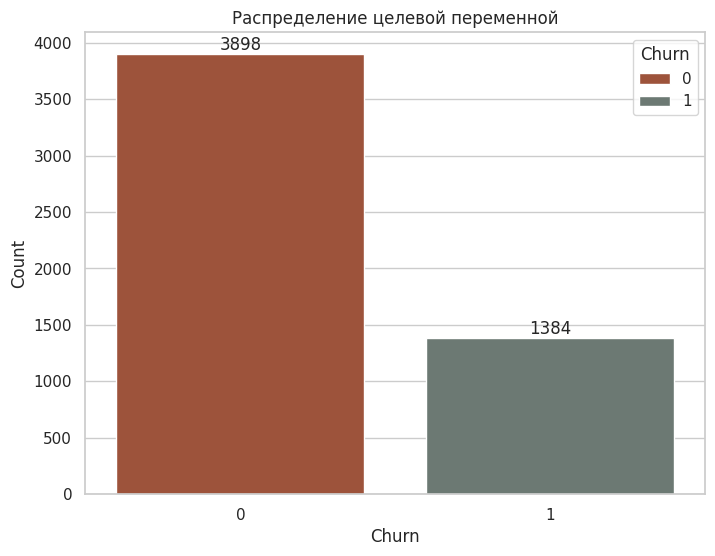

In [36]:
target_data = train[target_col].value_counts()

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=target_data.index, y=target_data.values, hue=target_data.index)
for container in ax.containers:
  ax.bar_label(container=container)
plt.title('Распределение целевой переменной')
plt.ylabel('Count')

*   Видим, что классы в задаче не сбалансированы: примеров нулевого класса практически в 3 раза больше примеров первого класса. Это означает, что нужно не использовать accuracy как метрику. Поэтому в данном случае мы используем стандартную для задачи классификации метрику ROC-AUC.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [37]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [38]:
X = num_cols + cat_cols
y = target_col

In [39]:
col_transformer = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), num_cols),
        ('encoder', OneHotEncoder(), cat_cols)
        ])

logreg_pipe = Pipeline(
    steps=[
        ('preproc', col_transformer),
        ('model', LogisticRegression())
        ])

param_grid = {'model__C' : [100, 10, 1, 0.1, 0.01, 0.001],
              'model__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [40]:
clf = GridSearchCV(logreg_pipe, param_grid=param_grid, scoring = 'roc_auc', cv = 5)
clf.fit(train[X], train[y])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'TotalSpent']),
                                                                        ('encoder',
                                                                         OneHotEncoder(),
                                                                         ['Sex',
                                                                          'IsSeniorCitizen',
                                                                          'HasPartner',
                                                                          'HasChild',
                                                                          'HasMultiplePhoneNumbers',
                                                                          'HasInternetService',
                                                                          'HasOnlineSecurityService',
                                                                          'HasOnlineBackup',
                                                                          'HasDeviceProtection',
                                                                          'HasTechSupportAccess',
                                                                          'HasOnlineTV',
                                                                          'HasMovieSubscription',
                                                                          'HasContractPhone',
                                                                          'IsBillingPaperless',
                                                                          'PaymentMethod'])])),
                                       ('model', LogisticRegression())]),
             param_grid={'model__C': [100, 10, 1, 0.1, 0.01, 0.001],
                         'model__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                           'sag', 'saga']},
             scoring='roc_auc')

**Выпишите какое лучшее качество и с какими параметрами вам удалось получить**
1. Построим тепловую карту

In [41]:
regularization = clf.cv_results_['param_model__C'].data
solvers = clf.cv_results_['param_model__solver'].data
auc_score = clf.cv_results_['mean_test_score']

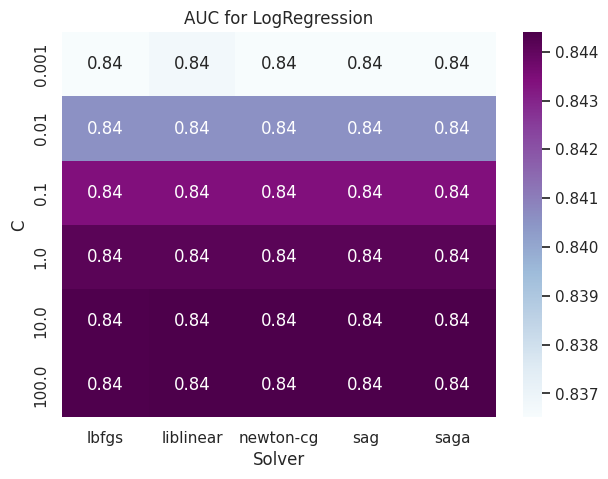

In [42]:
sns.set_style('white')
plt.figure(figsize=(7, 5))

heatmap_data = pd.DataFrame(data={'C': regularization, 'Solver': solvers, 'AUC': auc_score})
heatmap_data = heatmap_data.pivot(index='C', columns='Solver', values='AUC')

sns.heatmap(heatmap_data, annot=True, cmap='BuPu').set_title('AUC for LogRegression')

plt.show()

2. Выведем оптимальные гиперпараметры логистической регрессии.

In [43]:
best_C = clf.best_params_['model__C']
best_solver = clf.best_params_['model__solver']
best_score = clf.best_score_

print('Optimal Inverse of regularization strength ', best_C)
print('Optimal Algorithm                          ', best_solver)
print('AUC-ROC                                    ', best_score)

Optimal Inverse of regularization strength  100
Optimal Algorithm                           newton-cg
AUC-ROC                                     0.8443981508612401


**Создание итоговой модели**

In [44]:
pipe = Pipeline(
    steps=[
        ('preproc', col_transformer),
        ('model', LogisticRegression(C=best_C, solver=best_solver))
    ])

pipe.fit(train[X], train[y])

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['ClientPeriod',
                                                   'MonthlySpending',
                                                   'TotalSpent']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['Sex', 'IsSeniorCitizen',
                                                   'HasPartner', 'HasChild',
                                                   'HasMultiplePhoneNumbers',
                                                   'HasInternetService',
                                                   'HasOnlineSecurityService',
                                                   'HasOnlineBackup',
                                                   'HasDeviceProtection',
                                                   'HasTechSupportAccess',
                                                   'HasOnlineTV',
                                                   'HasMovieSubscription',
                                                   'HasContractPhone',
                                                   'IsBillingPaperless',
                                                   'PaymentMethod'])])),
                ('model', LogisticRegression(C=100, solver='newton-cg'))])

# Предсказания

In [45]:
y_pred_prob = pipe.predict_proba(test[X])[:, 1]
pd.DataFrame({'Churn': y_pred_prob}).to_csv(f'submission_logreg.csv', index_label='Id')

**ROC-AUC вашего решения равен 0.8466462527873831. Это дает вам 5.0 баллов.**

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [46]:
def plot_roc_curve(y_train, y_train_pred,
                   y_valid, y_valid_pred,
                   model=None):

  train_score = roc_auc_score(y_train, y_train_pred)
  valid_score = roc_auc_score(y_valid, y_valid_pred)

  train_fpr, train_tpr, _ = roc_curve(y_train, y_train_pred)
  valid_fpr, valid_tpr, _ = roc_curve(y_valid, y_valid_pred)

  plt.figure(figsize=(12, 8))
  plt.plot(train_fpr, train_tpr, label=f'Train score: {train_score:2f}',)
  plt.plot(valid_fpr, valid_tpr, label=f'Valid score: {valid_score:2f}')
  plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100))

  plt.title(f'ROC curve for {model}')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(fontsize='large', framealpha=1)

  plt.show()

In [47]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.3 MB/s eta 0:00:00


In [48]:
from catboost import CatBoostClassifier, Pool

In [49]:
train = pd.read_csv('train.csv')
X_train, X_valid, y_train, y_valid = train_test_split(train[X], train[y],
                                                      test_size=0.25,
                                                      stratify=train[y],
                                                      random_state=42)

In [50]:
train_data = Pool(X_train, y_train, cat_features=cat_cols)
valid_data = Pool(X_valid, y_valid, cat_features=cat_cols)

In [51]:
cat_clf = CatBoostClassifier(random_state=42, verbose=0, eval_metric='AUC')
cat_clf.fit(train_data, verbose=False)

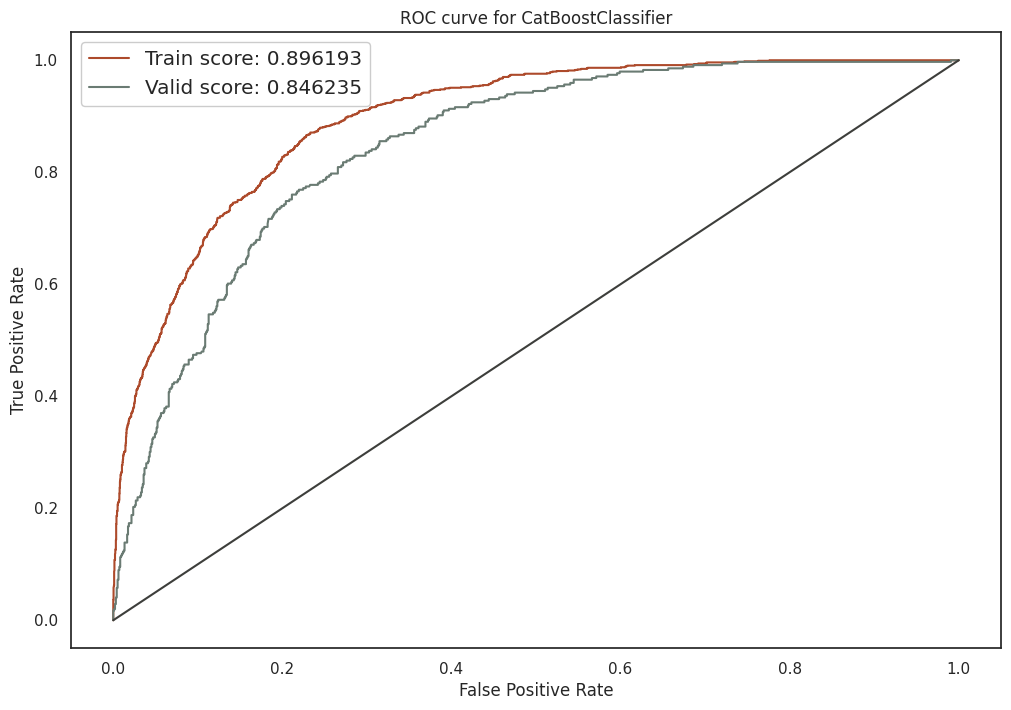

In [52]:
plot_roc_curve(y_train, cat_clf.predict_proba(X_train)[:, 1],
               y_valid, cat_clf.predict_proba(X_valid)[:, 1],
               model='CatBoostClassifier')

In [ ]:
grid_cat = CatBoostClassifier(random_state=42, verbose=0, eval_metric='AUC')
parameters = {'depth': [2, 4, 6, 8], 'n_estimators': [50, 100, 200, 500]}
grid_cat.grid_search(parameters, train_data, verbose=False, stratified=True)


bestTest = 0.8251100914
bestIteration = 47

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.

bestTest = 0.830408767
bestIteration = 99

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.

bestTest = 0.8324929407
bestIteration = 163

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.

bestTest = 0.8350645422
bestIteration = 499

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.

bestTest = 0.8323332661
bestIteration = 42

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.

bestTest = 0.83645119
bestIteration = 99

Metric AUC is not calculated on train by default. To calculat

{'params': {'depth': 4, 'iterations': 500},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
       

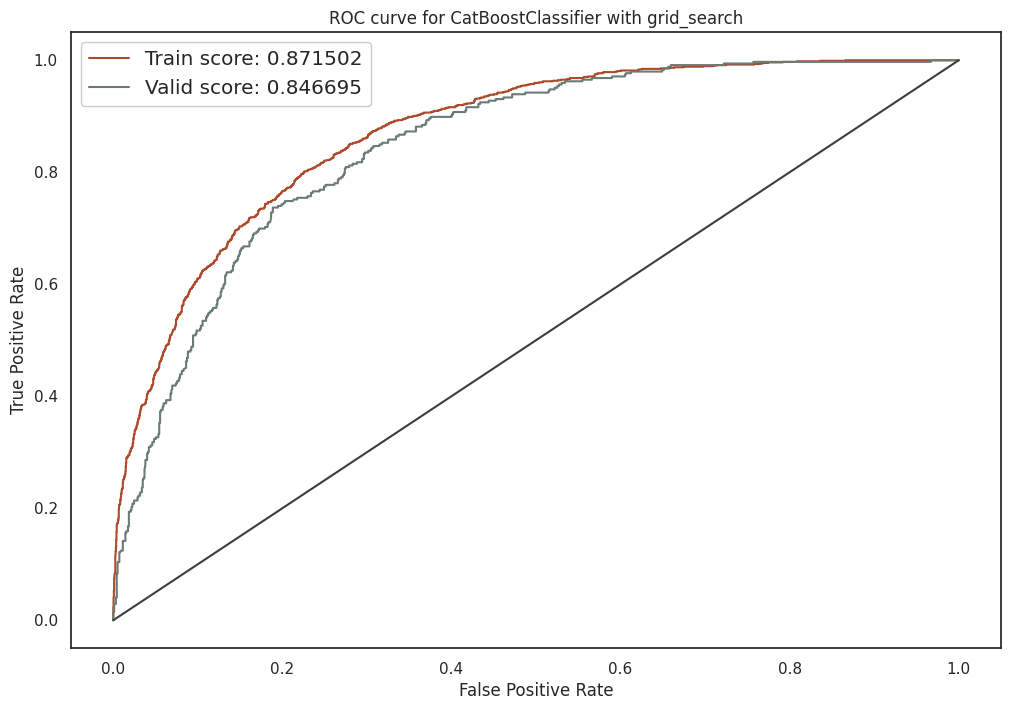

In [ ]:
plot_roc_curve(y_train, grid_cat.predict_proba(X_train)[:, 1],
               y_valid, grid_cat.predict_proba(X_valid)[:, 1],
               model='CatBoostClassifier with grid_search')